In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision.datasets import DatasetFolder
import torchvision
from tqdm.notebook import tqdm as tqdm
from torchsampler import ImbalancedDatasetSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.')
else:
    print('CUDA is available!')
device = "cuda" if train_on_gpu else "cpu"

CUDA is available!


In [3]:
train_image_path = "/home/max/Desktop/galaxy_image/eight_type/train/"
val_image_path = "/home/max/Desktop/galaxy_image/eight_type/validation/"
test_image_path = "/home/max/Desktop/galaxy_image/eight_type/test/"

In [4]:
batch_size = 16
train_trans = transforms.Compose([
#                                   transforms.RandomHorizontalFlip(),
#                                   transforms.RandomRotation((-30, 30)),
#                                   transforms.Resize((256, 256)),
#                                   transforms.RandomCrop(size=(100, 100)),
#                                     transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((256, 256)),
#                                   transforms.CenterCrop(200),
#                                   transforms.Resize((256, 256)),
#                                   transforms.Resize((255, 255)),
#                                   transforms.GaussianBlur(7,3),
#                                   transforms.ColorJitter(contrast=0.8),
                                  transforms.ToTensor()
                                  ])

train_data = ImageFolder(train_image_path, transform = train_trans)
train_loader = DataLoader(train_data, pin_memory = True, batch_size = batch_size, sampler=ImbalancedDatasetSampler(train_data))

val_trans = transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor()])
val_data = ImageFolder(val_image_path, transform = val_trans)
val_loader = DataLoader(val_data, shuffle = True)

test_trans = transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor()])
test_data = ImageFolder(test_image_path, transform = test_trans)
test_loader = DataLoader(test_data, shuffle = True)

print('Train:', len(train_data))
print('Valid:', len(val_data))
print('Test:', len(test_data))

Train: 1923
Valid: 145
Test: 145


tensor([4, 7, 0, 2, 6, 2, 4, 5, 5, 6, 2, 7, 7, 4, 0, 6])
tensor([[[0.1098, 0.0824, 0.2235,  ..., 0.0118, 0.0000, 0.0000],
         [0.2353, 0.1686, 0.1843,  ..., 0.0000, 0.0000, 0.0000],
         [0.2196, 0.1020, 0.0000,  ..., 0.1843, 0.0000, 0.0745],
         ...,
         [0.0784, 0.0000, 0.0000,  ..., 0.0039, 0.2118, 0.0980],
         [0.2000, 0.1647, 0.0000,  ..., 0.0902, 0.1647, 0.0000],
         [0.0980, 0.2471, 0.1804,  ..., 0.0000, 0.1176, 0.1176]],

        [[0.1216, 0.1020, 0.0000,  ..., 0.1569, 0.0000, 0.1176],
         [0.0000, 0.2000, 0.1529,  ..., 0.1333, 0.1725, 0.2000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1882],
         ...,
         [0.1725, 0.2275, 0.1922,  ..., 0.1216, 0.0000, 0.0000],
         [0.1804, 0.1294, 0.1804,  ..., 0.1333, 0.0000, 0.0000],
         [0.1804, 0.0000, 0.0000,  ..., 0.0902, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.1098, 0.1882, 0.2706],
         [0.0000, 0.0000, 0.0000,  ..., 0.1255, 0.1961, 0.2078],
 

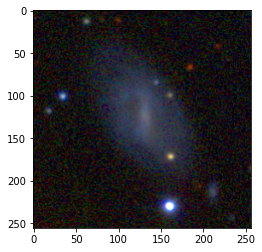

tensor([[[0.0000, 0.1020, 0.0000,  ..., 0.0000, 0.0392, 0.2118],
         [0.0824, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1647, 0.1294, 0.0000,  ..., 0.0000, 0.0000, 0.0235],
         ...,
         [0.1529, 0.2000, 0.1529,  ..., 0.0000, 0.0000, 0.0000],
         [0.1412, 0.1843, 0.2392,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0510, 0.0902, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.2275, 0.1059],
         [0.1412, 0.0471, 0.0000,  ..., 0.0000, 0.0392, 0.1373],
         [0.0000, 0.0000, 0.0000,  ..., 0.1059, 0.1059, 0.1961],
         ...,
         [0.0000, 0.0000, 0.1882,  ..., 0.0000, 0.0902, 0.1333],
         [0.0000, 0.0000, 0.0392,  ..., 0.0000, 0.0000, 0.0000],
         [0.1333, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.1725, 0.1804, 0.1608,  ..., 0.1255, 0.0000, 0.0000],
         [0.1608, 0.2118, 0.2118,  ..., 0.3020, 0.1294, 0.0000],
         [0.1843, 0.2196, 0.2000,  ..., 0.2824, 0.2353, 0.

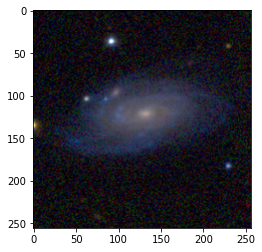

tensor([[[0.1216, 0.0000, 0.0000,  ..., 0.1647, 0.1373, 0.1961],
         [0.0000, 0.1373, 0.2235,  ..., 0.1882, 0.2627, 0.2510],
         [0.0000, 0.0000, 0.1882,  ..., 0.0902, 0.1412, 0.1216],
         ...,
         [0.1294, 0.1569, 0.2118,  ..., 0.0000, 0.0000, 0.1843],
         [0.0000, 0.0000, 0.2078,  ..., 0.0000, 0.0471, 0.0000],
         [0.0000, 0.0000, 0.1843,  ..., 0.0784, 0.0000, 0.0000]],

        [[0.1961, 0.0941, 0.1137,  ..., 0.0000, 0.0471, 0.0000],
         [0.0627, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1961,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1529, 0.0000, 0.0000],
         [0.0824, 0.0000, 0.0000,  ..., 0.2078, 0.0000, 0.0000],
         [0.1961, 0.1922, 0.1608,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0706, 0.0980, 0.0000],
         [0.2667, 0.0000, 0.0000,  ..., 0.1490, 0.0000, 0.0000],
         [0.2431, 0.0000, 0.0000,  ..., 0.2118, 0.2431, 0.

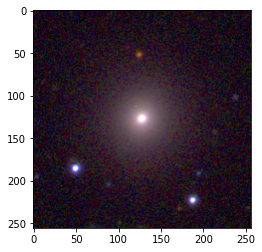

In [5]:
images, labels = next(iter(train_loader))
print(labels)
for i in np.arange(3):
    print(images[i])
    plt.figure(i)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.show()

In [6]:
256 * 28 * 28

200704

In [7]:
# 1. Input layer
# 2. Convolutional layer
# 3. ReLU layer
# 4. Pooling layer
# 5. Fully-connected layer
class Galaxy(nn.Module):
  def __init__(self):
    super(Galaxy, self).__init__()
    # input_shape = (3, 224, 224)
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
    #                 padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
    # in_channels: Input channels
    # out_channels: Output channels
    # kernel_size: Fillter size
    # stride: Each step our Fillter move
    # padding: We want our image can remain origin size
    self.cnn = nn.Sequential(
        ## CNN1
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, stride = 1, padding = 1), # padding = kernel_size / 2
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),## (64, 112, 112)
        ## CNN2
        nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),## (128, 56, 56)
        ## CNN3
        nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),## (256, 28, 28)
        ## CNN4
        nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),## (512, 14, 14)
        ## CNN5
        nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)## (512, 7, 7)
        ## CNN6
#         nn.Conv2d(in_channels = 512, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2)## (1024, 3, 3)
    )
    self.fc = nn.Sequential(
        nn.Linear(32768, 256), # Fully-connected layer
        nn.Dropout(0.5), # Avoid overfitting
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.Dropout(0.5),
        nn.ReLU(),
#         nn.Linear(512, 256),
#         nn.Dropout(0.5),
#         nn.ReLU(),
        nn.Linear(128, 8)
    )
  # forward propagation
  def forward(self, x):
    x = self.cnn(x)
    x = x.flatten(1)
    x = self.fc(x)
    return x

In [8]:
model = Galaxy()
# model = torchvision.models.vgg16(pretrained=False)
# model = torchvision.models.resnet18(pretrained=False)
model = model.to(device)
print(model)

Galaxy(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=32768, out_features=256, bias=Tru

In [9]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [10]:
!nvidia-smi

Sun Oct 24 17:01:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 470.74       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   44C    P2    47W / 200W |   1853MiB /  7973MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.9, weight_decay=0.01)
loss_func = nn.CrossEntropyLoss()
# # reg = JacobianReg() # Jacobian regularization
# lambda_JR = 0.01 # hyperparameter
# l1_crit = nn.L1Loss(size_average=False)
# factor = 0.03
n_epochs = 50
train_loss_record = []
train_acc_record = []
val_loss_record = []
val_acc_record = []
min_loss = 2000.
for epoch in range(n_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_acc = 0.0
    val_acc = 0.0
    model.train()
    for x, y in tqdm(train_loader):
#         print(x.shape)
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
#         print(x.shape)
        prediction = model(x)
#         reg_loss = 0
#         reg_loss = l1_crit(prediction.argmax(dim = 1), y)
#         print(prediction.shape)
#         print(y.shape)
        loss = loss_func(prediction, y)
        
#         loss = super_loss + factor*reg_loss
        
        loss.backward()
        optimizer.step()
        
        acc = ((prediction.argmax(dim = 1) == y).float().mean())
        train_acc += acc/len(train_loader)
        train_loss += loss/len(train_loader)
    print(f"[ Train | {epoch+1}/{n_epochs} ] loss = {train_loss:.5f}, acc = {train_acc:.5f}")
    train_loss_record.append(train_loss.cpu().detach().numpy())
    train_acc_record.append(train_acc.cpu().detach().numpy())

    model.eval()
    for x, y in tqdm(val_loader):
        x, y = x.to(device), y.to(device)
        prediction = model(x)
#         reg_loss = 0

#         reg_loss = l1_crit(prediction.argmax(dim = 1), y)
        
        loss = loss_func(prediction, y)
        
#         loss = super_loss + factor*reg_loss
        loss.backward()
        acc = ((prediction.argmax(dim = 1) == y).float().mean())
        val_acc += acc/len(val_loader)
        val_loss += loss/len(val_loader)
        if loss < min_loss:
            min_loss = loss
            torch.save(model, 'eight_easy.pkl')
    print(f"[ Validation | {epoch+1}/{n_epochs} ] loss = {val_loss:.5f}, acc = {val_acc:.5f}")
    val_loss_record.append(val_loss.cpu().detach().numpy())
    val_acc_record.append(val_acc.cpu().detach().numpy())
# torch.save(model, 'E_I_Sc.pkl')

  0%|          | 0/121 [00:00<?, ?it/s]

/home/max/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[ Train | 1/50 ] loss = 2.08052, acc = 0.12087


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 1/50 ] loss = 2.07324, acc = 0.13793


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 2/50 ] loss = 2.02126, acc = 0.18371


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 2/50 ] loss = 1.78072, acc = 0.26897


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 3/50 ] loss = 1.90387, acc = 0.24191


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 3/50 ] loss = 1.74260, acc = 0.29655


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 4/50 ] loss = 1.82677, acc = 0.26326


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 4/50 ] loss = 1.74760, acc = 0.26207


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 5/50 ] loss = 1.82914, acc = 0.27359


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 5/50 ] loss = 1.64043, acc = 0.36552


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 6/50 ] loss = 1.78292, acc = 0.27669


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 6/50 ] loss = 1.63731, acc = 0.31034


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 7/50 ] loss = 1.77164, acc = 0.27376


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 7/50 ] loss = 1.64303, acc = 0.22759


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 8/50 ] loss = 1.72887, acc = 0.29046


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 8/50 ] loss = 1.57206, acc = 0.32414


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 9/50 ] loss = 1.69948, acc = 0.30923


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 9/50 ] loss = 1.56026, acc = 0.34483


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 10/50 ] loss = 1.72172, acc = 0.30217


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 10/50 ] loss = 1.53216, acc = 0.31724


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 11/50 ] loss = 1.69800, acc = 0.29545


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 11/50 ] loss = 1.58937, acc = 0.31034


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 12/50 ] loss = 1.69933, acc = 0.29873


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 12/50 ] loss = 1.50969, acc = 0.37241


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 13/50 ] loss = 1.63202, acc = 0.30510


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 13/50 ] loss = 1.50529, acc = 0.33103


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 14/50 ] loss = 1.61919, acc = 0.31801


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 14/50 ] loss = 1.47768, acc = 0.37241


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 15/50 ] loss = 1.59765, acc = 0.32438


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 15/50 ] loss = 1.44169, acc = 0.39310


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 16/50 ] loss = 1.53413, acc = 0.35348


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 16/50 ] loss = 1.42624, acc = 0.36552


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 17/50 ] loss = 1.54821, acc = 0.35606


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 17/50 ] loss = 1.49990, acc = 0.33103


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 18/50 ] loss = 1.55013, acc = 0.33833


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 18/50 ] loss = 1.42335, acc = 0.37931


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 19/50 ] loss = 1.49158, acc = 0.35847


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 19/50 ] loss = 1.44034, acc = 0.43448


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 20/50 ] loss = 1.51110, acc = 0.37379


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 20/50 ] loss = 1.42959, acc = 0.33793


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 21/50 ] loss = 1.49871, acc = 0.36536


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 21/50 ] loss = 1.42553, acc = 0.38621


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 22/50 ] loss = 1.44124, acc = 0.37689


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 22/50 ] loss = 1.42610, acc = 0.33793


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 23/50 ] loss = 1.41371, acc = 0.40995


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 23/50 ] loss = 1.37924, acc = 0.44138


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 24/50 ] loss = 1.42761, acc = 0.40289


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 24/50 ] loss = 1.44726, acc = 0.42069


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 25/50 ] loss = 1.38412, acc = 0.41030


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 25/50 ] loss = 1.45110, acc = 0.37241


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 26/50 ] loss = 1.39111, acc = 0.43079


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 26/50 ] loss = 1.41553, acc = 0.44138


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 27/50 ] loss = 1.32852, acc = 0.43836


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 27/50 ] loss = 1.43385, acc = 0.44828


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 28/50 ] loss = 1.30649, acc = 0.47280


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 28/50 ] loss = 1.42936, acc = 0.43448


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 29/50 ] loss = 1.29132, acc = 0.45007


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 29/50 ] loss = 1.44787, acc = 0.45517


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 30/50 ] loss = 1.30453, acc = 0.45541


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 30/50 ] loss = 1.42602, acc = 0.38621


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 31/50 ] loss = 1.25910, acc = 0.47899


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 31/50 ] loss = 1.44801, acc = 0.48276


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 32/50 ] loss = 1.22268, acc = 0.50413


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 32/50 ] loss = 1.49849, acc = 0.43448


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 33/50 ] loss = 1.21117, acc = 0.50517


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 33/50 ] loss = 1.43403, acc = 0.36552


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 34/50 ] loss = 1.23186, acc = 0.49380


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 34/50 ] loss = 1.44944, acc = 0.46207


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 35/50 ] loss = 1.20414, acc = 0.51119


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 35/50 ] loss = 1.47814, acc = 0.46207


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 36/50 ] loss = 1.10767, acc = 0.54270


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 36/50 ] loss = 1.50031, acc = 0.44828


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 37/50 ] loss = 1.10901, acc = 0.53753


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 37/50 ] loss = 1.51353, acc = 0.42759


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 38/50 ] loss = 1.11838, acc = 0.52738


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 38/50 ] loss = 1.49867, acc = 0.44138


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 39/50 ] loss = 1.10560, acc = 0.55337


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 39/50 ] loss = 1.50873, acc = 0.47586


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 40/50 ] loss = 1.05205, acc = 0.56767


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 40/50 ] loss = 1.54470, acc = 0.45517


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 41/50 ] loss = 1.03997, acc = 0.58712


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 41/50 ] loss = 1.59392, acc = 0.42759


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 42/50 ] loss = 1.05179, acc = 0.56784


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 42/50 ] loss = 1.54048, acc = 0.44828


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 43/50 ] loss = 1.01489, acc = 0.58901


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 43/50 ] loss = 1.51998, acc = 0.43448


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 44/50 ] loss = 1.03466, acc = 0.58419


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 44/50 ] loss = 1.57377, acc = 0.45517


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 45/50 ] loss = 0.94732, acc = 0.62052


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 45/50 ] loss = 1.60655, acc = 0.48276


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 46/50 ] loss = 0.95723, acc = 0.62121


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 46/50 ] loss = 1.60495, acc = 0.44828


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 47/50 ] loss = 0.94435, acc = 0.61863


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 47/50 ] loss = 1.54849, acc = 0.46207


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 48/50 ] loss = 0.91514, acc = 0.63189


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 48/50 ] loss = 1.59901, acc = 0.46897


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 49/50 ] loss = 0.86926, acc = 0.65048


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 49/50 ] loss = 1.65311, acc = 0.47586


  0%|          | 0/121 [00:00<?, ?it/s]

[ Train | 50/50 ] loss = 0.83581, acc = 0.66116


  0%|          | 0/145 [00:00<?, ?it/s]

[ Validation | 50/50 ] loss = 1.61189, acc = 0.44828


In [12]:
!nvidia-smi

Sun Oct 24 17:07:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 470.74       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 42%   61C    P2   150W / 200W |   3792MiB /  7973MiB |     61%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
actu = []
ai_pred = []
model.eval()
test_acc = 0.0
test_loss = 0.0
for x, y in test_loader:
    x, y = x.to(device), y.to(device)
    prediction = model(x)
    actu.append(y.to('cpu').numpy()[0])
    ai_pred.append(prediction.argmax().to('cpu').numpy().tolist())
    loss = loss_func(prediction, y)
    loss.backward()
    acc = ((prediction.argmax(dim = 1) == y).float().mean())
    test_acc += acc/len(test_loader)
    test_loss += loss/len(test_loader)
print(f"[ Test ] loss = {test_loss:.5f}, acc = {test_acc:.5f}")

[ Test ] loss = 1.86744, acc = 0.35172


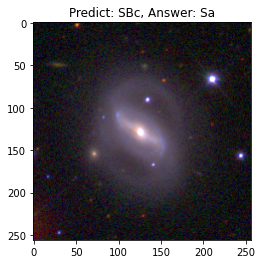

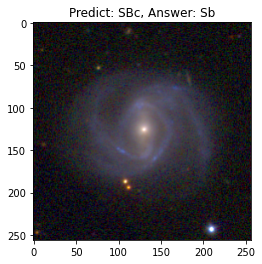

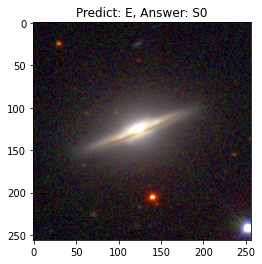

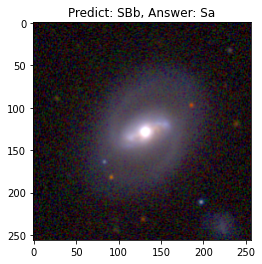

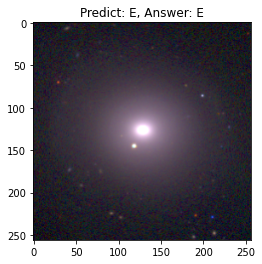

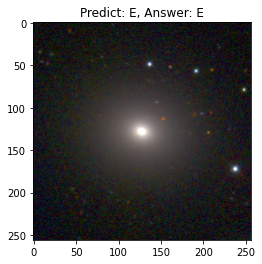

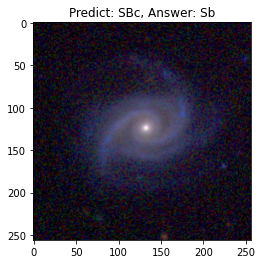

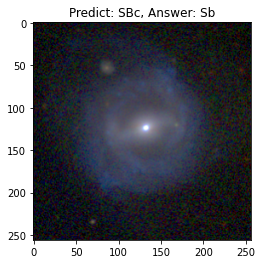

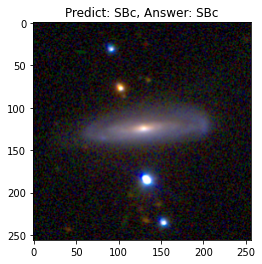

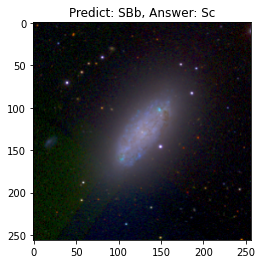

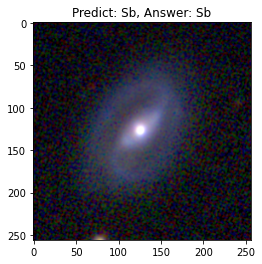

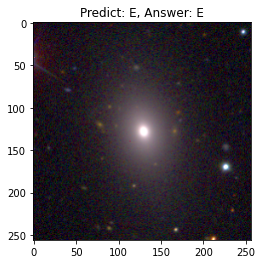

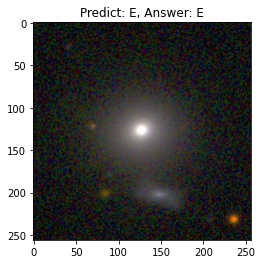

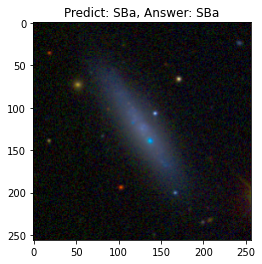

In [14]:
model = torch.load('eight_easy.pkl')
galaxy_type = ['E', 'S0', 'Sa', 'Sb', 'SBa', 'SBb', 'SBc', 'Sc']
loss_func = nn.CrossEntropyLoss()
i = 0
for x, y in test_loader:
    i += 1
    if train_on_gpu:
        x, y = x.cuda(), y.cuda()
    output = model(x)
    out = output.argmax(dim = 1)
    out = out.to('cpu').numpy()
    ans = galaxy_type[y[0]]
    pre = galaxy_type[out[0]]
    if i % 10 == 0:
        
        plt.figure(i)
        plt.title(f'Predict: {pre}, Answer: {ans}')
#         if out[0] == 0:
            
#         elif out[0] == 1:
#             plt.title(f'Predict: {pre}, Answer: {ans}')
#         else:
#             plt.title(f'Predict: S, Answer: {ans}')
        x = x.squeeze()
        x = x.to('cpu')
        plt.imshow(x.permute(1, 2, 0))
        plt.show()

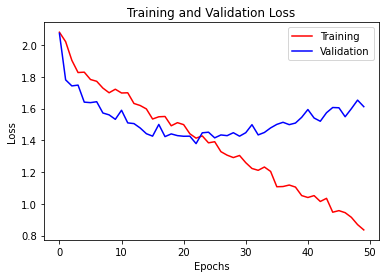

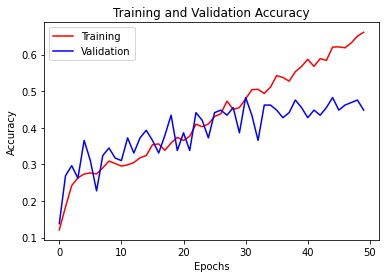

In [15]:
plt.figure(1)
plt.title('Training and Validation Loss')
train_l, = plt.plot(train_loss_record, color = 'red')
val_l, = plt.plot(val_loss_record, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(handles = [train_l, val_l], labels = ['Training', 'Validation'], loc = 'best')
plt.show()

plt.figure(2)
plt.title('Training and Validation Accuracy')
train_a, = plt.plot(train_acc_record, color = 'red')
val_a, = plt.plot(val_acc_record, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(handles = [train_a, val_a], labels = ['Training', 'Validation'], loc = 'best')
plt.show()

In [16]:
confmat = confusion_matrix(y_true=actu, y_pred=ai_pred)

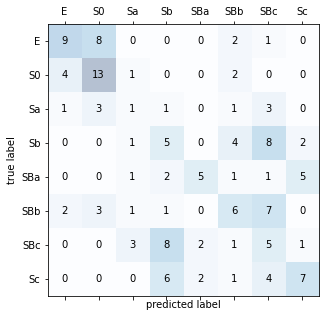

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7],['E', 'S0', 'Sa', 'Sb', 'SBa', 'SBb', 'SBc', 'Sc'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7],['E', 'S0', 'Sa', 'Sb', 'SBa', 'SBb', 'SBc', 'Sc'])
plt.show()